# Not selling for N days Likelihood

Some python common imports...

In [32]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt

Sample data from a binomial (theta has a random value)

In [31]:
# Simulate data
import matplotlib.gridspec as gridspec
from sympy.interactive import printing

np.random.seed(123)

nobs = 10000
theta = 0.3
Y = np.random.binomial(1, theta, nobs)

Here is a cool plot... it looks nice for `nobs <= 1000`. When nobs is higher it gets cumbersome (that's why it's commented). It gives you the idea of what kind of dataset the binomial is creating.

In [34]:
#with plt.style.context('fivethirtyeight'):
#    plt.figure()
#    plt.plot(range(nobs), Y, 'x')
#    plt.ylim(-1, 2)
#    plt.show()

This horrible hackish script creates the following data strucutre:
`Map[number_of_days_without_selling, number_of_times_it_happened]`

In [44]:
z, c = ({}, 0)
for Yi in Y:
    if Yi == 1:
        if c in z:
            z[c] += 1
        else:
            z[c] = 1
        c = 0
    c += 1
print(z)

{1: 892, 2: 656, 3: 414, 4: 328, 5: 222, 6: 158, 7: 94, 8: 68, 9: 47, 10: 36, 11: 27, 12: 19, 13: 14, 14: 9, 15: 5, 16: 5, 17: 3, 18: 4, 19: 2, 22: 1, 25: 1}


The following facy plot shows what's the likelihood each "number of days with selling".

<IPython.core.display.Javascript object>


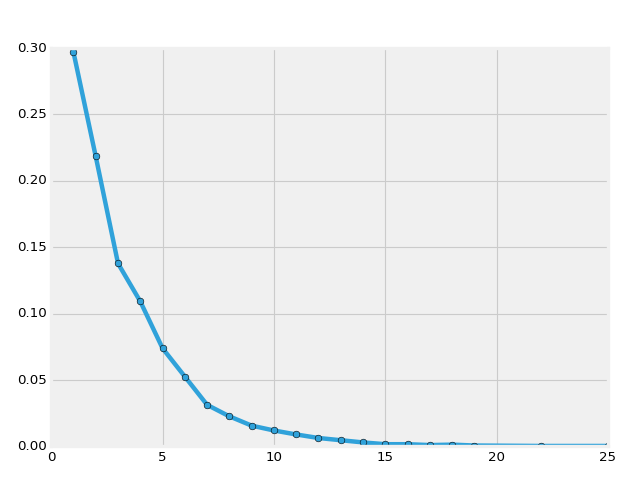

In [47]:
x, y = zip(*[(z1, z[z1]/sum(z.values())) for z1 in z])

with plt.style.context('fivethirtyeight'):
    plt.figure()
    plt.plot(x, y, '-o')    
    plt.show()

For instance the likelihood of selling a contract the seventh day, after 6 consecutive days of poorness, is close to `0.05`. This is not really informative, let's try to plot the cumulative distribution function (CDF).

<IPython.core.display.Javascript object>


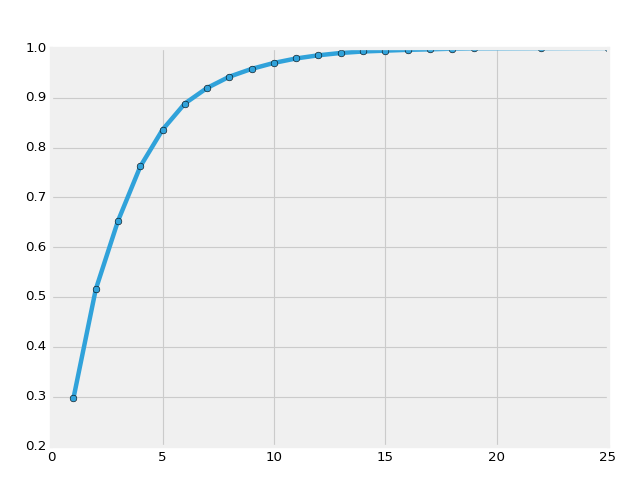

In [50]:
cum_y = np.cumsum(y)
with plt.style.context('fivethirtyeight'):
    plt.figure()
    plt.plot(x, cum_y, '-o')
    plt.show()

In [ ]:
This plot shows the likelihood of 

<IPython.core.display.Javascript object>


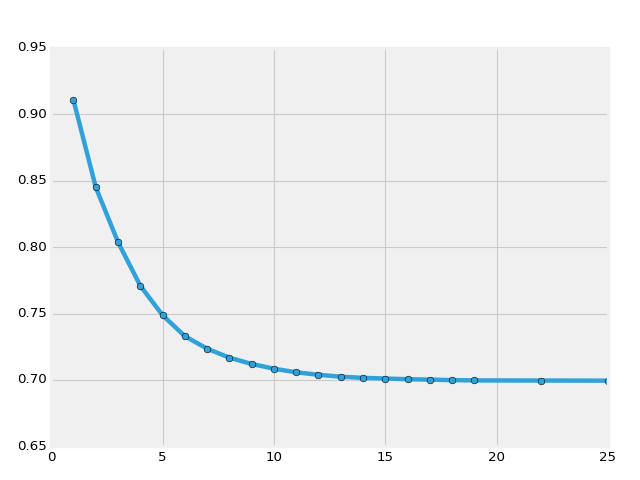

In [28]:
neg_cum_y = [1 - i for i in cum_y]
with plt.style.context('fivethirtyeight'):
    plt.figure()
    plt.plot(x, neg_cum_y, '-o')    
    plt.show()